In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [82]:
url = 'https://raw.githubusercontent.com/preet-pandey/Titanic-EDA-Analysis/refs/heads/main/titanic_train.csv'
train = pd.read_csv('titanic_train.csv')


In [83]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
train.shape

(891, 12)

In [85]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [86]:
# checking missing values (false = no missing value ; True  = missing value)
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


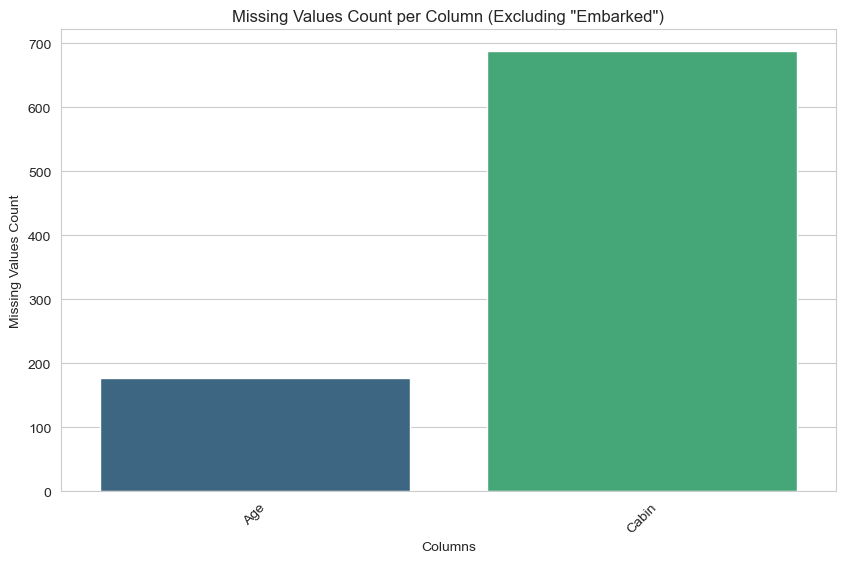

In [87]:
missing_counts = train.isnull().sum()

# Filter out "Embarked" and any columns with no missing data
missing_counts = missing_counts[(missing_counts > 0) & (missing_counts.index != 'Embarked')]

# Create bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')
plt.title('Missing Values Count per Column (Excluding "Embarked")')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

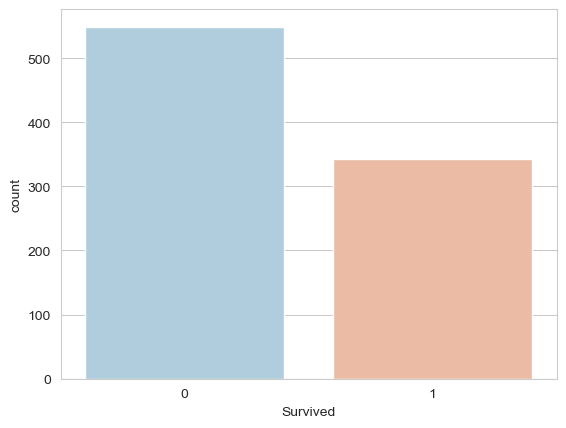

In [88]:
#checking how many people get survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

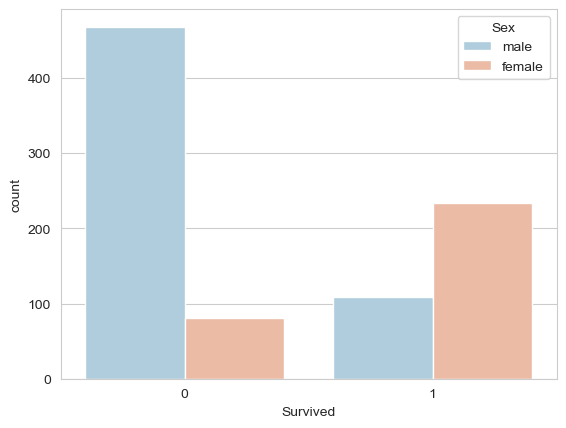

In [89]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
# (hue) parameter is Show the how many male/female Survived
#(palette)is for colourfull visualization 


<Axes: xlabel='Survived', ylabel='count'>

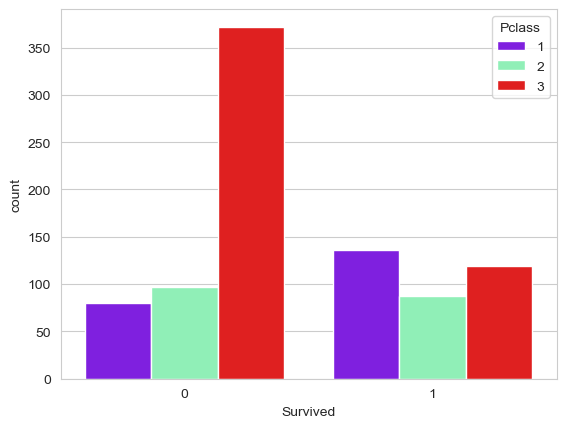

In [90]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: xlabel='Age'>

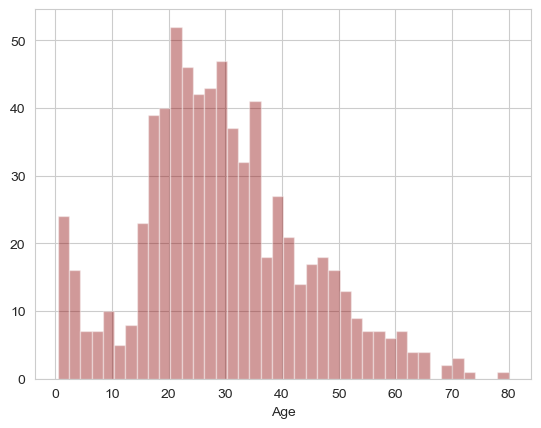

In [91]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)
#this graph is like a bell curve(normal distribution)

<Axes: xlabel='SibSp', ylabel='count'>

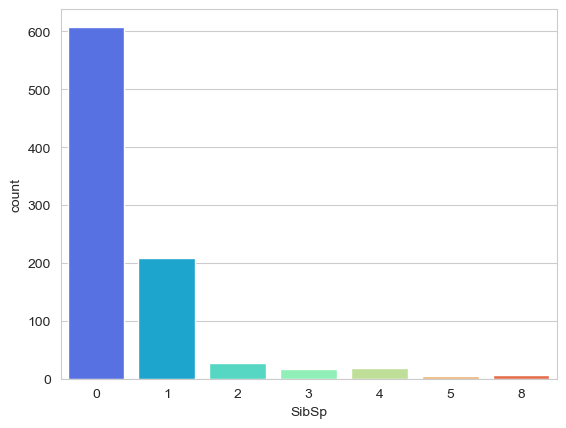

In [92]:
sns.countplot(x='SibSp',data=train,palette='rainbow')
#this will show the count of (sibling or spouse)

<Axes: xlabel='Pclass', ylabel='Age'>

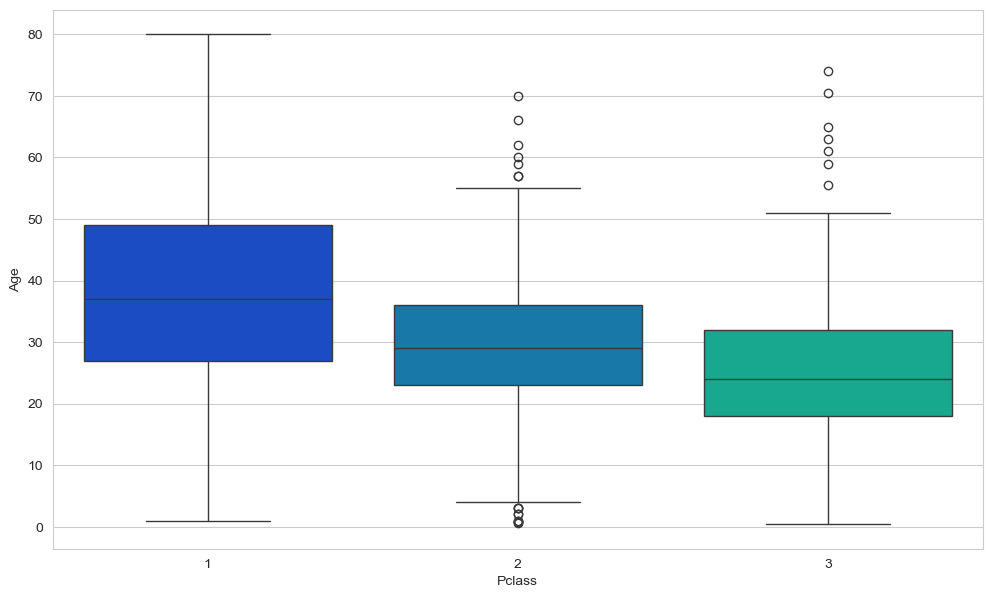

In [93]:
#data cleaning
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass' ,y='Age' ,data=train,palette='winter')

In [94]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return 24
    

In [95]:
#imputation
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

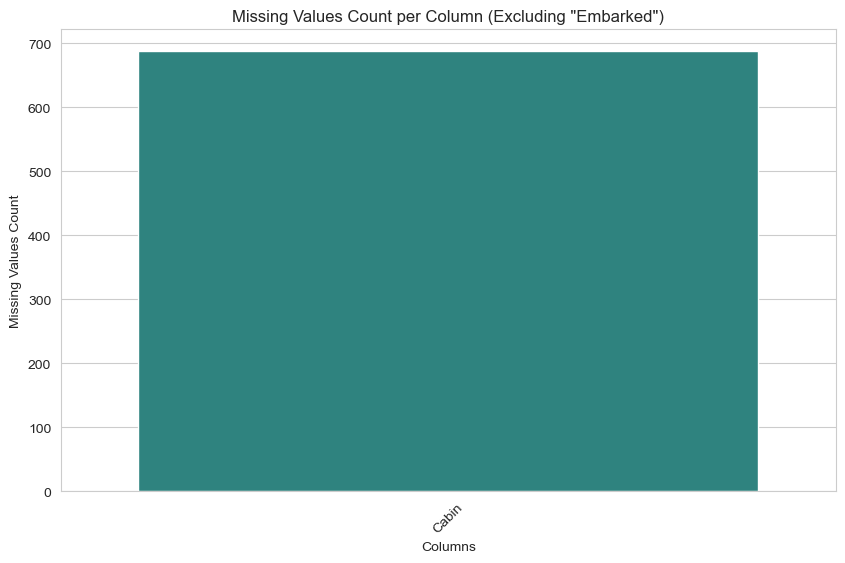

In [96]:
missing_counts = train.isnull().sum()

# Filter out "Embarked" and any columns with no missing data
missing_counts = missing_counts[(missing_counts > 0) & (missing_counts.index != 'Embarked')]

# Create bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')
plt.title('Missing Values Count per Column (Excluding "Embarked")')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45)
plt.show()

In [97]:
train.drop('Cabin',axis=1,inplace=True)

In [98]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,24,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,24,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S
